In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data      # 4 features
y = iris.target    # 3 classes: Setosa, Versicolor, Virginica

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create datasets and loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
class IrisANN(nn.Module):
    def __init__(self):
        super(IrisANN, self).__init__()
        self.fc1 = nn.Linear(4, 10)        # Input layer: 4 features → 10 neurons
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)        # Output layer: 3 classes
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
model = IrisANN()


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_list = []
accuracy_list = []

for epoch in range(50):
    total_loss = 0
    correct = 0
    total = 0
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    loss_list.append(total_loss)
    accuracy_list.append(acc)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")


Epoch 1, Loss: 8.7111, Accuracy: 0.4083
Epoch 2, Loss: 6.8013, Accuracy: 0.7667
Epoch 3, Loss: 5.2609, Accuracy: 0.8167
Epoch 4, Loss: 4.1621, Accuracy: 0.8250
Epoch 5, Loss: 3.2451, Accuracy: 0.8750
Epoch 6, Loss: 2.9553, Accuracy: 0.8750
Epoch 7, Loss: 2.5720, Accuracy: 0.8750
Epoch 8, Loss: 2.2238, Accuracy: 0.8917
Epoch 9, Loss: 2.0035, Accuracy: 0.9250
Epoch 10, Loss: 1.7386, Accuracy: 0.9417
Epoch 11, Loss: 1.5564, Accuracy: 0.9250
Epoch 12, Loss: 1.3618, Accuracy: 0.9417
Epoch 13, Loss: 1.2816, Accuracy: 0.9417
Epoch 14, Loss: 1.2342, Accuracy: 0.9583
Epoch 15, Loss: 1.0833, Accuracy: 0.9583
Epoch 16, Loss: 1.0363, Accuracy: 0.9583
Epoch 17, Loss: 0.9111, Accuracy: 0.9500
Epoch 18, Loss: 0.8518, Accuracy: 0.9583
Epoch 19, Loss: 0.8168, Accuracy: 0.9667
Epoch 20, Loss: 0.7559, Accuracy: 0.9667
Epoch 21, Loss: 0.7467, Accuracy: 0.9667
Epoch 22, Loss: 0.7038, Accuracy: 0.9583
Epoch 23, Loss: 0.6761, Accuracy: 0.9583
Epoch 24, Loss: 0.6697, Accuracy: 0.9667
Epoch 25, Loss: 0.6850, A


Test Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



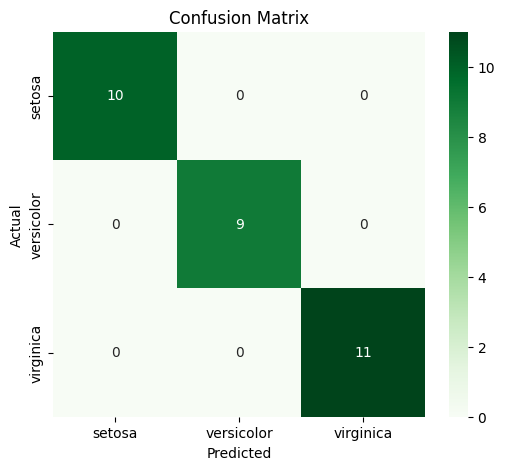

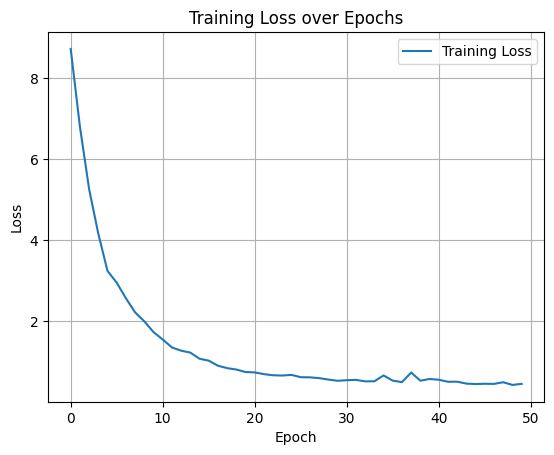

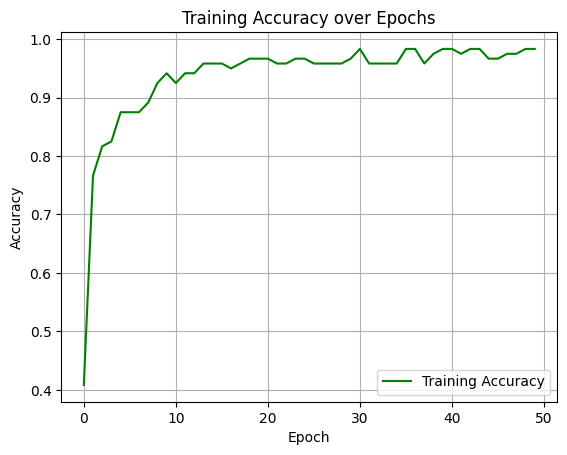

In [6]:
# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_acc = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {test_acc:.2f}")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Loss and Accuracy Plots
plt.plot(loss_list, label='Training Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(accuracy_list, label='Training Accuracy', color='green')
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()
